# Bmad to Impact-T

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pytao import Tao
from pmd_beamphysics import FieldMesh
import numpy as np

from pmd_beamphysics.interfaces.impact import create_impact_emfield_cartesian_ele
from impact.interfaces.bmad import tao_create_impact_emfield_cartesian_ele, tao_create_impact_lattice_and_fieldmaps, impact_from_tao

import matplotlib.pyplot as plt

In [3]:
tao = Tao(lattice_file='lat.bmad')

In [4]:
IX_ELE = 2

In [5]:
grid_params = tao.ele_grid_field(IX_ELE, 1, 'base')
grid_params

{'dr': array([0.00508, 0.00508, 0.005  ]),
 'r0': array([-0.0508, -0.0508, -0.25  ]),
 'master_parameter': '<None>',
 'ele_anchor_pt': 'Center',
 'field_type': 'Magnetic',
 'grid_field^geometry': 'xyz',
 'harmonic': 0,
 'phi0_fieldmap': 0.0,
 'field_scale': 1.0,
 'interpolation_order': 1,
 'curved_ref_frame': False,
 'file': 'correctorcoil.h5'}

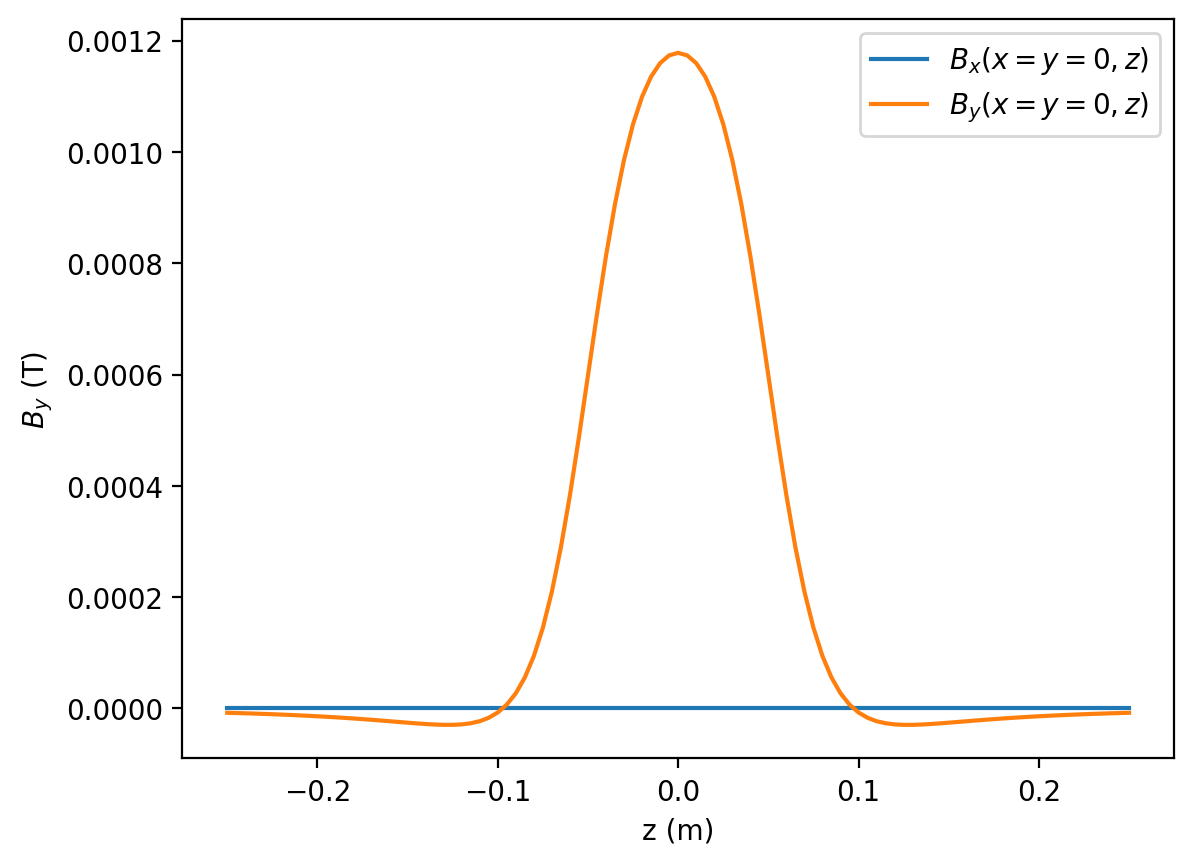

In [6]:
FM = FieldMesh(grid_params['file'])
FM.plot_onaxis(['Bx', 'By'])

In [7]:
tao_create_impact_emfield_cartesian_ele(tao,
                            IX_ELE,
                            file_id=666, 
                            output_path=None,
                            cache=None,
                            name=None
                               )

{'info': {'integral_Bx_dz': np.float64(4.552802091491698e-22),
  'integral_By_dz': np.float64(0.00011352149537307138),
  'integral_Bz_dz': np.float64(1.783004353970288e-21),
  'integral_Ex_dz': np.float64(0.0),
  'integral_Ey_dz': np.float64(0.0),
  'integral_Ez_dz': np.float64(0.0)},
 'line': '0.5 0 0 111 0.5 0.1 0 0.0 666 0.15 0.0 0.0 0 0 0 /name:COIL',
 'ele': {'L': np.float64(0.5),
  'type': 'emfield_cartesian',
  'zedge': np.float64(0.5),
  'rf_field_scale': np.float64(0.1),
  'rf_frequency': 0,
  'theta0_deg': 0.0,
  'filename': '1T666.T7',
  'radius': 0.15,
  'x_offset': 0.0,
  'y_offset': 0.0,
  'x_rotation': 0.0,
  'y_rotation': 0.0,
  'z_rotation': 0.0,
  'name': 'COIL',
  's': np.float64(1.0)},
 'fmap': {'info': {'format': 'emfield_cartesian_fieldmesh'},
  'field': <FieldMesh with rectangular geometry and (np.int64(21), np.int64(21), np.int64(101)) shape at 0x1696c4b30>}}

In [8]:
tao_create_impact_lattice_and_fieldmaps(tao)

([{'L': np.float64(0.5),
   'type': 'emfield_cartesian',
   'zedge': np.float64(0.5),
   'rf_field_scale': np.float64(0.1),
   'rf_frequency': 0,
   'theta0_deg': 0.0,
   'filename': '1T1.T7',
   'radius': 0.15,
   'x_offset': 0.0,
   'y_offset': 0.0,
   'x_rotation': 0.0,
   'y_rotation': 0.0,
   'z_rotation': 0.0,
   'name': 'COIL',
   's': np.float64(1.0)}],
 {'1T1.T7': {'info': {'format': 'emfield_cartesian_fieldmesh'},
   'field': <FieldMesh with rectangular geometry and (np.int64(21), np.int64(21), np.int64(101)) shape at 0x175d5ce30>}})

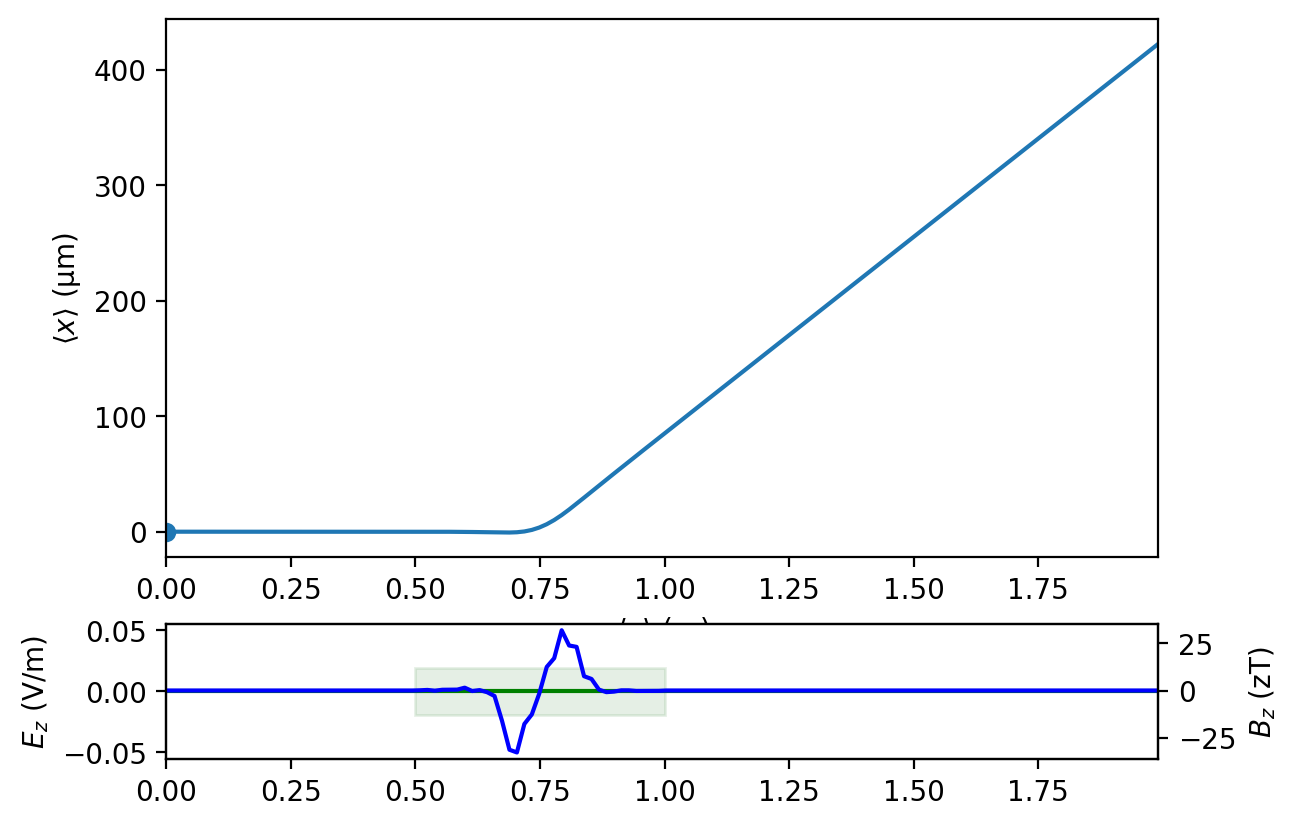

In [9]:
I =impact_from_tao(tao)
I.track1(pz0=10e6)
I.plot('mean_x')

# Compare 

Text(0, 0.5, '$x$ (mm)')

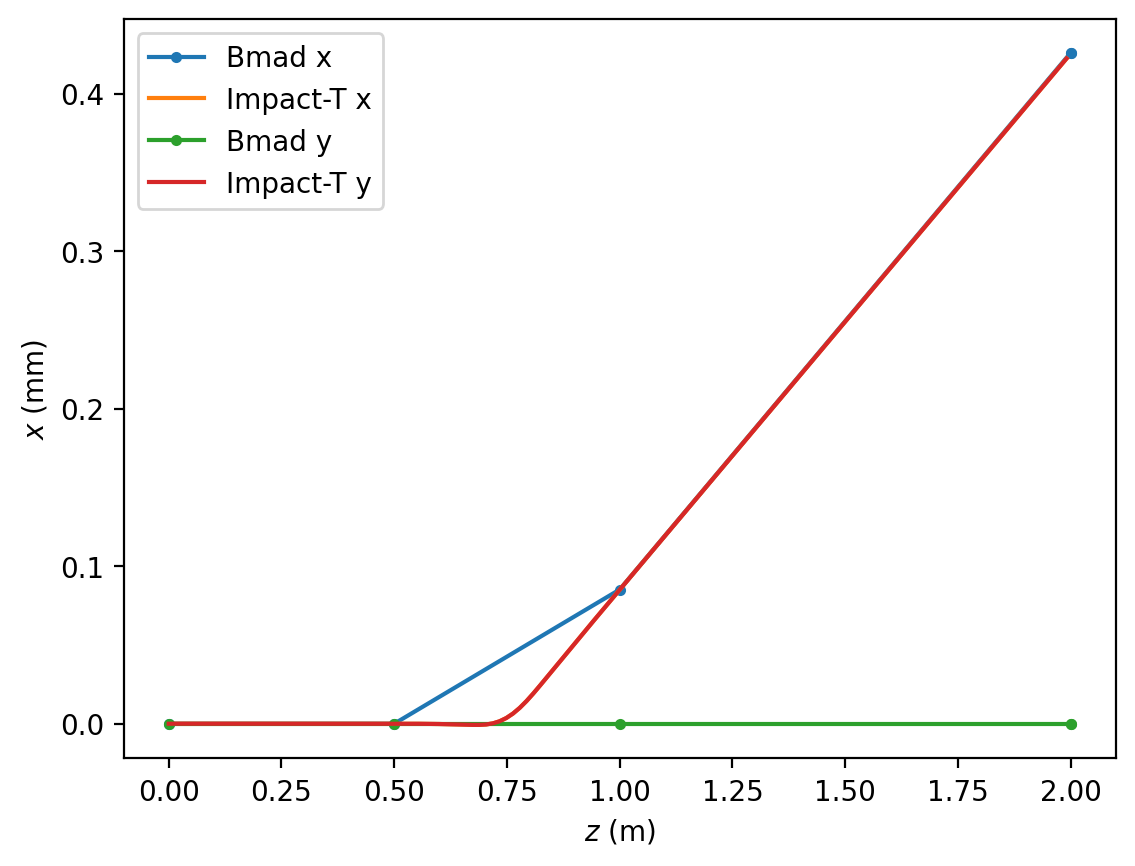

In [10]:
s1 = tao.lat_list('*', 'ele.s')
x1 = tao.lat_list('*', 'orbit.vec.1')
y1 = tao.lat_list('*', 'orbit.vec.3')

z2 = I.stat('mean_z')
x2 = I.stat('mean_x')
y2 = I.stat('mean_x')

fix, ax = plt.subplots()
ax.plot(s1, x1*1e3, marker='.', label='Bmad x')
ax.plot(z2, x2*1e3,  label='Impact-T x')
ax.plot(s1, y1*1e3, marker='.', label='Bmad y')
ax.plot(z2, y2*1e3,  label='Impact-T y')

plt.legend()
ax.set_xlabel(r'$z$ (m)')
ax.set_ylabel(r'$x$ (mm)')